# The Determinant as an Area

In the first week, we learned that the determinant is a number that tells us if a matrix is singular. If `det(A) = 0`, the matrix is singular.

Now, we'll explore the beautiful geometric meaning of this number. For a 2D linear transformation, the determinant tells us the **scaling factor of the area**. It measures how much the area of a shape changes after the transformation is applied.

Specifically, the determinant is the **area of the parallelogram** that the original unit square is transformed into.

---

## Case 1: Non-Singular Transformation (det ≠ 0)

Let's consider our standard non-singular matrix:  

$ A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} $  

Its determinant is $ (3)(2) - (1)(1) = 5 $.

The original unit square, formed by the basis vectors $\hat{i}$ and $\hat{j}$, has an area of 1. When we apply the transformation, this square is warped into a parallelogram. The area of this new parallelogram is exactly **5**, the value of the determinant.

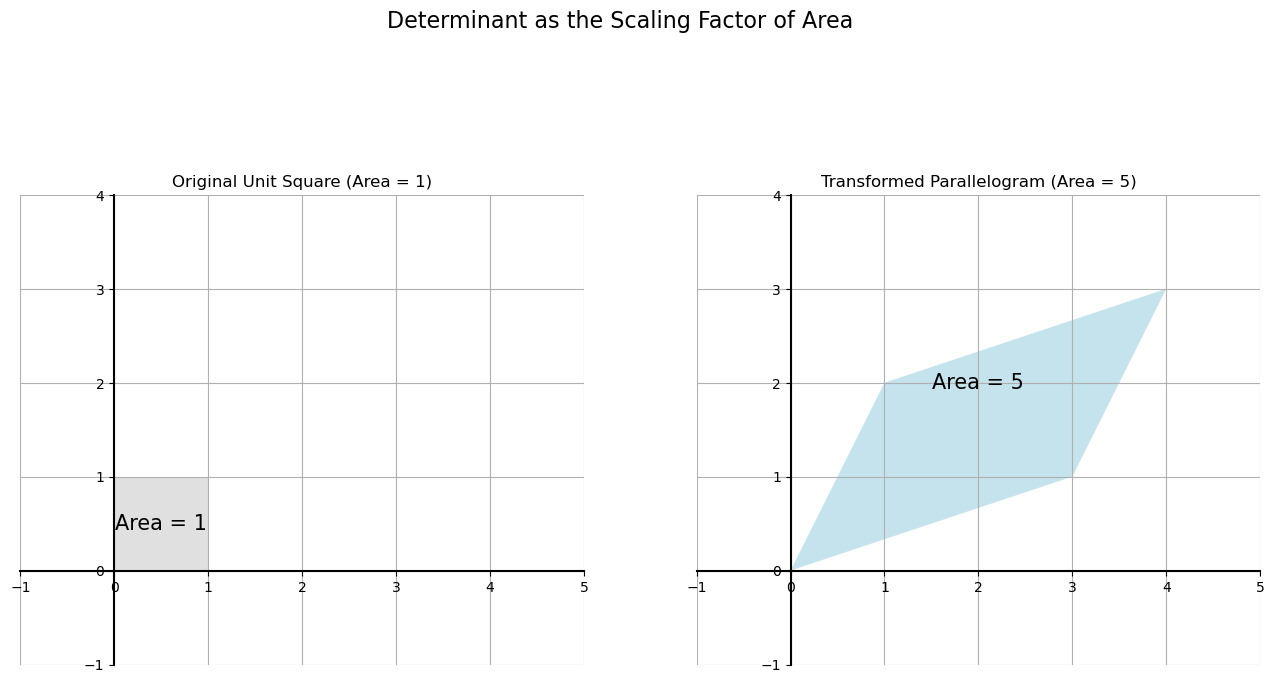

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the non-singular transformation matrix ---
A = np.array([[3, 1], [1, 2]])

# --- Define the original unit square ---
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# --- Apply the transformation ---
transformed_parallelogram = (A @ square.T).T

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Determinant as the Scaling Factor of Area', fontsize=16, y=1.02)

# --- Plot 1: Original Space ---
ax1.fill(square[:, 0], square[:, 1], 'lightgray', alpha=0.7)
ax1.set_title('Original Unit Square (Area = 1)')
ax1.text(0.5, 0.5, 'Area = 1', ha='center', va='center', fontsize=15)


# --- Plot 2: Transformed Space ---
ax2.fill(transformed_parallelogram[:, 0], transformed_parallelogram[:, 1], 'lightblue', alpha=0.7)
ax2.set_title('Transformed Parallelogram (Area = 5)')
ax2.text(2, 2, 'Area = 5', ha='center', va='center', fontsize=15)


# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

---

## Case 2: Singular Transformation (det = 0)

What happens with a singular matrix? Let's take our example:  

$ B = \begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix} $  

Its determinant is $ (1)(2) - (1)(2) = 0 $.

When we apply this transformation, the unit square is collapsed into a flat line segment. A line segment has **zero area**. This is why the determinant is 0.

This gives us the key geometric insight:
> A transformation is **singular** if it squashes space into a lower dimension, reducing its area (or volume) to **zero**.

---

## What About Negative Determinants?

A determinant can be negative. For example, if we swap the columns of our matrix `A`:  

$ C = \begin{bmatrix} 1 & 3 \\ 2 & 1 \end{bmatrix} \implies \det(C) = (1)(1) - (3)(2) = -5 $  

A negative determinant means the transformation **inverts the orientation of space**.

Think of the basis vectors $\hat{i}$ (x-axis) and $\hat{j}$ (y-axis). Normally, $\hat{j}$ is 90 degrees counter-clockwise from $\hat{i}$. A transformation with a negative determinant "flips" the space, so that the transformed $\hat{j}$ is now on the "wrong" side of the transformed $\hat{i}$.

The **absolute value** of the determinant, $|-5| = 5$, still tells us the scaling factor of the area. For determining singularity, all that matters is whether the determinant is **zero** or **non-zero**.

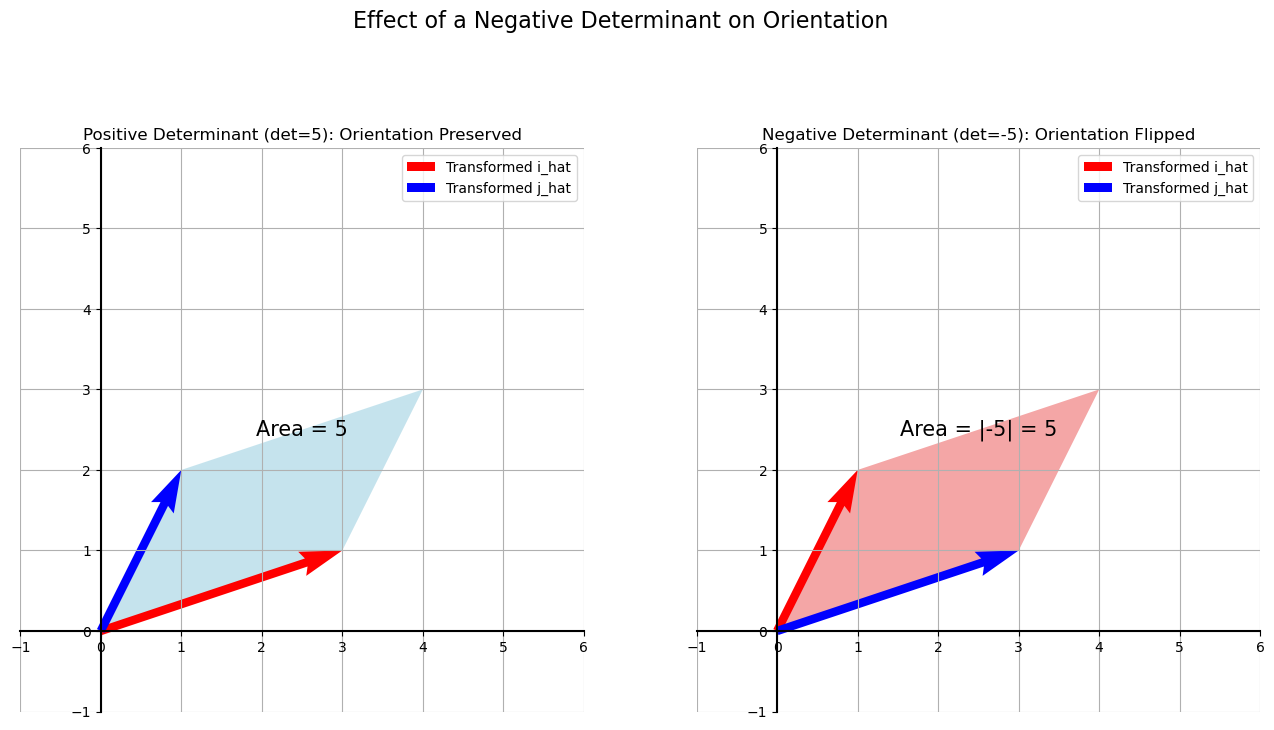

In [2]:
# --- Define a matrix with a positive determinant and one with a negative determinant ---
A_pos = np.array([[3, 1], [1, 2]]) # det = 5
A_neg = np.array([[1, 3], [2, 1]]) # det = -5

# --- Define the original unit square ---
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# --- Apply the transformations ---
transformed_pos = (A_pos @ square.T).T
transformed_neg = (A_neg @ square.T).T

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Effect of a Negative Determinant on Orientation', fontsize=16, y=1.02)

# --- Plot 1: Positive Determinant ---
ax1.fill(transformed_pos[:, 0], transformed_pos[:, 1], 'lightblue', alpha=0.7)
# Plot transformed basis vectors
ax1.quiver(0, 0, A_pos[0, 0], A_pos[1, 0], angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label='Transformed i_hat')
ax1.quiver(0, 0, A_pos[0, 1], A_pos[1, 1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.015, label='Transformed j_hat')
ax1.set_title('Positive Determinant (det=5): Orientation Preserved')
ax1.text(2.5, 2.5, 'Area = 5', ha='center', va='center', fontsize=15)


# --- Plot 2: Negative Determinant ---
ax2.fill(transformed_neg[:, 0], transformed_neg[:, 1], 'lightcoral', alpha=0.7)
# Plot transformed basis vectors
ax2.quiver(0, 0, A_neg[0, 0], A_neg[1, 0], angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label='Transformed i_hat')
ax2.quiver(0, 0, A_neg[0, 1], A_neg[1, 1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.015, label='Transformed j_hat')
ax2.set_title('Negative Determinant (det=-5): Orientation Flipped')
ax2.text(2.5, 2.5, 'Area = |-5| = 5', ha='center', va='center', fontsize=15)

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 6)
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()